In [1]:
function game_sizes(num_players, num_strategies)
    num_roles = length(num_players)
    full_sizes = zeros(num_roles)
    dev_sizes = zeros(num_roles)
    for r in 1:num_roles
        p = num_players[r]
        s = num_strategies[r]
        full_sizes[r] = binomial(p+s-1, p)
        dev_sizes[r] = binomial(p+s-2, p-1)
    end
    monolithic_size = prod(full_sizes) * sum(num_strategies)
    separated_size = 0
    for r in 1:num_roles
        separated_size += prod(full_sizes) / full_sizes[r] * dev_sizes[r] * num_strategies[r]
    end
    return monolithic_size, separated_size
end

game_sizes (generic function with 1 method)

In [2]:
sizes = zeros(4,20,20)
for r in 1:4
   for p in 1:20
       for s in 1:20
           (mon,sep) = game_sizes([p for i in 1:r], [s for i in 1:r])
           sizes[r,p,s] = mon/sep
       end
   end
end

In [3]:
using Plots

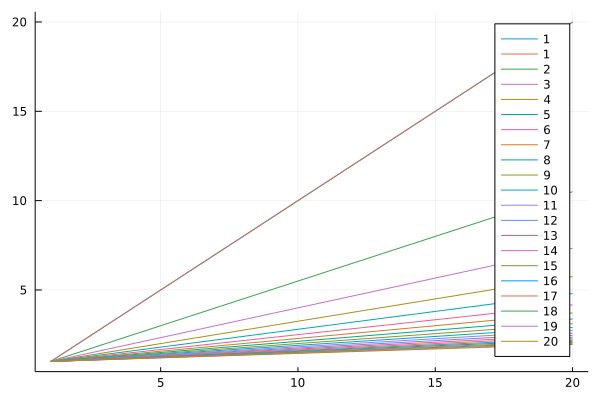

In [18]:
plt = plot(1:20, sizes[1,1,:], label="1")
for p in 1:20
   plt = plot!(1:20, sizes[1,p,:], label=string(p))
end
plt

In [16]:
println(isapprox(sizes[1,:,:], sizes[2,:,:]))
println(isapprox(sizes[1,:,:], sizes[3,:,:]))
println(isapprox(sizes[1,:,:], sizes[4,:,:]))

true
true
true
